# 5.- Análisis de los resultados

En esta sección describiremos los experimentos realizados y estudiaremos los resultados obtenidos. (Se adjunta también esta parte en formato HTML, donde las tablas y texto se muestran de una forma más elegante).


En el PAR consideraremos 5 ejecuciones con semillas de generación de números
aleatorios diferentes para cada algoritmo en cada conjunto de datos con su conjunto de restricciones. Esto quiere decir que un algoritmo cualquiera, se ejecutará 5 veces por cada conjunto de datos y de restricciones, por lo que supondrá un total de $5*4*2=40$ ejecuciones por algoritmo. Las semillas elegidas para cada una de las 5 ejecuciones de los algoritmos, como se puede comprobar en la Notebook `Ejecucion_y_resultados.ipynb`, son `seeds = [0, 14, 17, 25, 31]`. Estas han sido elegidas de forma arbitraria siempre comprobando que la ejecución del algoritmo Greedy (COPKM) no cicla de forma infinita con la inicialización pseudoaleatoria de los centroides dada por cada semilla.



El resultado final de las medidas de validación será calculado como la media de los 5 valores obtenidos para cada conjunto de datos y restricciones.
Como se indica en el guión, para facilitar la comparación de algoritmos en las prácticas del PAR se
considerarán cuatro estadísticos distintos denominados Tasa_C (la desviación general de la partición solución en las distintas ejecuciones), Tasa_inf (el $infeasibility$), Agregado (la evaluación de la función objetivo) y el tiempo de ejecución T.

Recordamos que la función objetivo venía dada por:

$f = \hat{C} + \lambda * infeasibility$

Así, es importante mencionar que en los siguientes resultados el hyperparámetro $\lambda$ utilizado ha sido el cociente entre la distancia máxima existente en el conjunto de datos, $D = \text{max}_{x_i,x_j \in X}\{distance(x_i-x_j)\}$, y el número de restricciones del problema $|R|$:

$\lambda = \frac{D}{|R|}$.


In [1]:
import os
import pandas as pd
from leer_datos import *
from funciones_auxiliares_y_estadisticos import *
from algoritmos import *

In [2]:
#Cargamos las tablas
results_folder = os.pardir + "/Results/"
dataframes = np.load(results_folder + 'dataframes_all_algorithms.npy',allow_pickle='TRUE').item()
global_results_dfs = np.load(results_folder + 'dataframes_global_comparison.npy',allow_pickle='TRUE').item()

## 5.1-Resultados obtenidos con cada algoritmo

En primer lugar vamos a mostrar las tablas de ejecución de cada algoritmo y vamos a comentar las diferencias generales que se observan en los resultados sobre los distintos conjuntos de datos y de restricciones (sin entrar aún a comparar los resultados de los distintos algoritmos, lo cual abordaremos en el siguiente apartado). Recordamos que los resultados del *COPKM* y de la Búsqueda Local fueron ya explicados y analizados en la memoria de la práctica 1. No obstante en esta práctica 2 se han ejecutado en el nuevo dataset *Newthyroid* y es por ello que se muestran también aquí.

Resultados obtenidos por el *COPKM* en cada conjunto de datos dado el 10% del total de restricciones:

In [3]:
dataframes[("COPKM", 10)]

Iris                                      Ecoli  \
                     Tasa_C   Tasa_inf      Agr.         T      Tasa_C   
Ejecución 1        0.173456  35.000000  0.395463  0.180694  201.296981   
Ejecución 2        0.148829   0.000000  0.148829  0.231419  222.752358   
Ejecución 3        0.243392  83.000000  0.769865  0.167850  232.058982   
Ejecución 4        0.148829   0.000000  0.148829  0.167587  240.091561   
Ejecución 5        0.148829   0.000000  0.148829  0.163595  234.233805   
Media              0.172667  23.600000  0.322363  0.182229  226.086737   
Desviación típica  0.036626  32.647205  0.243288  0.025260   13.592848   

                                                         Rand           \
                    Tasa_inf        Agr.          T    Tasa_C Tasa_inf   
Ejecución 1        124.00000  204.623845   3.581947  0.426085      0.0   
Ejecución 2        126.00000  226.132881  10.429566  0.426085      0.0   
Ejecución 3        115.00000  235.144379  14.684767  0.593006     31.0   
Ejecución 4        301.00000  248.167254   8.954754  0.426085      0.0   
Ejecución 5        365.00000  244.026590   9.654126  0.426085      0.0   
Media              206.20000  231.618990   9.461032  0.459469      6.2   
Desviación típica  105.55643   15.485846   3.551977  0.066768     12.4   

                                      Newthyroid                         \
                       Agr.         T     Tasa_C    Tasa_inf       Agr.   
Ejecución 1        0.426085  0.167952  60.153157   24.000000  61.030867   
Ejecución 2        0.426085  0.178700  69.892593  168.000000  76.036566   
Ejecución 3        0.816521  0.167218  71.069135   66.000000  73.482838   
Ejecución 4        0.426085  0.167369  62.460336    3.000000  62.570050   
Ejecución 5        0.426085  0.166170  62.300166   20.000000  63.031591   
Media              0.504172  0.169482  65.175077   56.200000  67.230382   
Desviación típica  0.156175  0.004645   4.423788   59.620131   6.235778   

                             
                          T  
Ejecución 1        0.490785  
Ejecución 2        0.332393  
Ejecución 3        0.333951  
Ejecución 4        0.478212  
Ejecución 5        0.454946  
Media              0.418057  
Desviación típica  0.070258

Resultados obtenidos por el *COPKM* en cada conjunto de datos dado el 20% del total de restricciones:

In [4]:
dataframes[("COPKM", 20)]

Iris                                      Ecoli  \
                     Tasa_C   Tasa_inf      Agr.         T      Tasa_C   
Ejecución 1        0.144022  21.000000  0.210594  0.174871  240.088037   
Ejecución 2        0.148829   0.000000  0.148829  0.189957  235.489955   
Ejecución 3        0.186499  60.000000  0.376706  0.297462  177.463791   
Ejecución 4        0.148829   0.000000  0.148829  0.175524  249.287102   
Ejecución 5        0.148829   0.000000  0.148829  0.171347  197.459443   
Media              0.155402  16.200000  0.206757  0.201832  219.957665   
Desviación típica  0.015660  23.361507  0.088277  0.048238   27.635481   

                                                          Rand           \
                     Tasa_inf        Agr.          T    Tasa_C Tasa_inf   
Ejecución 1         90.000000  241.295366   3.699347  0.426085      0.0   
Ejecución 2        250.000000  238.843648   9.898984  0.426085      0.0   
Ejecución 3         59.000000  178.255263   2.910767  0.420902     18.0   
Ejecución 4        422.000000  254.948136  15.851435  0.426085      0.0   
Ejecución 5         78.000000  198.505795   3.559698  0.426085      0.0   
Media              179.800000  222.369642   7.184046  0.425048      3.6   
Desviación típica  139.002734   29.005158   5.020647  0.002073      7.2   

                                      Newthyroid                         \
                       Agr.         T     Tasa_C    Tasa_inf       Agr.   
Ejecución 1        0.426085  0.172562  62.659821    0.000000  62.659821   
Ejecución 2        0.426085  0.123466  68.470538  352.000000  74.905682   
Ejecución 3        0.485765  0.116006  62.659821    0.000000  62.659821   
Ejecución 4        0.426085  0.172000  62.100914   91.000000  63.764545   
Ejecución 5        0.426085  0.172146  62.659821    0.000000  62.659821   
Media              0.438021  0.151236  63.710183   88.600000  65.329938   
Desviación típica  0.023872  0.025828   2.390000  136.334295   4.806951   

                             
                          T  
Ejecución 1        0.340398  
Ejecución 2        0.452830  
Ejecución 3        0.340583  
Ejecución 4        0.342575  
Ejecución 5        0.342801  
Media              0.363837  
Desviación típica  0.044507

Resultados obtenidos por la Búsqueda Local en cada conjunto de datos dado el 10% del total de restricciones:

In [5]:
dataframes[("BL", 10)]

Iris                                     Ecoli  \
                     Tasa_C   Tasa_inf      Agr.         T     Tasa_C   
Ejecución 1        0.173064  11.000000  0.242838  3.549502  90.488749   
Ejecución 2        0.147961  10.000000  0.211392  5.472892  88.731481   
Ejecución 3        0.164955  14.000000  0.253758  4.246338  82.376373   
Ejecución 4        0.148829   0.000000  0.148829  4.815099  88.213647   
Ejecución 5        0.148829   0.000000  0.148829  6.975041  73.927553   
Media              0.156728   7.000000  0.201129  5.011774  84.747561   
Desviación típica  0.010356   5.865151  0.044912  1.168748   6.058741   

                                                            Rand             \
                      Tasa_inf        Agr.           T    Tasa_C   Tasa_inf   
Ejecución 1        1076.000000  119.357342  164.824874  0.567493  17.000000   
Ejecución 2         870.000000  112.073186  246.646611  0.471133   9.000000   
Ejecución 3         882.000000  106.040033  185.752572  0.488334   5.000000   
Ejecución 4         653.000000  105.733341  194.677624  0.426085   0.000000   
Ejecución 5        1154.000000  104.888850  231.527741  0.481247   7.000000   
Media               927.000000  109.618550  204.685884  0.486858   7.600000   
Desviación típica   175.544866    5.498000   30.095593  0.045774   5.571355   

                                      Newthyroid                         \
                       Agr.         T     Tasa_C    Tasa_inf       Agr.   
Ejecución 1        0.690066  5.421015  37.825051  263.000000  47.443294   
Ejecución 2        0.536025  4.206658  28.058665  533.000000  47.551150   
Ejecución 3        0.524385  4.489495  39.027391  257.000000  48.426206   
Ejecución 4        0.426085  4.098372  36.547584  299.000000  47.482392   
Ejecución 5        0.531718  4.364523  38.199159  273.000000  48.183115   
Media              0.541656  4.516013  35.931570  325.000000  47.817231   
Desviación típica  0.084630  0.471764   4.016801  104.987618   0.406809   

                              
                           T  
Ejecución 1        15.291635  
Ejecución 2        18.193446  
Ejecución 3        15.041174  
Ejecución 4        20.048154  
Ejecución 5        18.933448  
Media              17.501571  
Desviación típica   1.997570

Resultados obtenidos por la Búsqueda Local en cada conjunto de datos dado el 20% del total de restricciones:

In [6]:
dataframes[("BL", 20)]

Iris                                     Ecoli  \
                     Tasa_C   Tasa_inf      Agr.         T     Tasa_C   
Ejecución 1        0.164327  13.000000  0.205538  7.089431  85.653598   
Ejecución 2        0.164935  19.000000  0.225167  7.804216  93.670943   
Ejecución 3        0.172664  58.000000  0.356531  6.142935  87.998345   
Ejecución 4        0.148829   0.000000  0.148829  7.712220  81.396033   
Ejecución 5        0.181723  75.000000  0.419481  7.238607  93.999634   
Media              0.166496  33.000000  0.271109  7.197482  88.543710   
Desviación típica  0.010855  28.544702  0.100672  0.593046   4.812382   

                                                            Rand           \
                      Tasa_inf        Agr.           T    Tasa_C Tasa_inf   
Ejecución 1        1799.000000  109.786775  493.439849  0.476127     44.0   
Ejecución 2        1459.000000  113.243097  344.433477  0.546218     34.0   
Ejecución 3        1733.000000  111.246147  328.455965  0.426085      0.0   
Ejecución 4        2436.000000  114.074420  352.515751  0.536014     45.0   
Ejecución 5        1456.000000  113.531544  467.763391  0.619710     54.0   
Media              1776.600000  112.376397  397.321687  0.520831     35.4   
Desviación típica   358.012625    1.609498   68.917279  0.065768     18.8   

                                       Newthyroid                          \
                       Agr.          T     Tasa_C     Tasa_inf       Agr.   
Ejecución 1        0.634680  10.438419  29.580781   978.000000  47.460243   
Ejecución 2        0.668736   7.594651  25.598305  1071.000000  45.177961   
Ejecución 3        0.426085   8.187196  25.598305  1071.000000  45.177961   
Ejecución 4        0.698171   6.599174  37.757858   509.000000  47.063222   
Ejecución 5        0.814298   7.056082  32.527740   674.000000  44.849578   
Media              0.648394   7.975105  30.212598   860.600000  45.945793   
Desviación típica  0.126511   1.341300   4.588539   228.368649   1.088396   

                              
                           T  
Ejecución 1        39.662784  
Ejecución 2        28.515394  
Ejecución 3        30.195772  
Ejecución 4        41.513329  
Ejecución 5        50.074861  
Media              37.992428  
Desviación típica   7.896506

Resultados obtenidos por el *AGG-UN* en cada conjunto de datos dado el 10% del total de restricciones:

In [7]:
dataframes[("AGG-UN", 10)]

Iris                                     \
                         Tasa_C Tasa_inf          Agr.           T   
Ejecución 1        1.488290e-01      0.0  1.488290e-01  368.221720   
Ejecución 2        1.488290e-01      0.0  1.488290e-01  191.557114   
Ejecución 3        1.488290e-01      0.0  1.488290e-01  187.904033   
Ejecución 4        1.488290e-01      0.0  1.488290e-01  188.437708   
Ejecución 5        1.488290e-01      0.0  1.488290e-01  194.121990   
Media              1.488290e-01      0.0  1.488290e-01  226.048513   
Desviación típica  2.482534e-17      0.0  2.482534e-17   71.122084   

                        Ecoli                                            Rand  \
                       Tasa_C     Tasa_inf        Agr.            T    Tasa_C   
Ejecución 1         95.681475   738.000000  115.481680  1920.986287  0.373341   
Ejecución 2         79.600594   979.000000  105.866720   899.044149  0.373341   
Ejecución 3         93.882430   887.000000  117.680238   904.361158  0.373341   
Ejecución 4         88.505484  1399.000000  126.040020   902.877389  0.373341   
Ejecución 5        107.149917  1122.000000  137.252668   894.495535  0.373341   
Media               92.963980  1025.000000  120.464265  1104.352903  0.373341   
Desviación típica    9.032468   224.861735   10.569814   408.330984  0.000000   

                                                 Newthyroid              \
                  Tasa_inf      Agr.           T     Tasa_C    Tasa_inf   
Ejecución 1            0.0  0.373341  239.734939  25.598305  561.000000   
Ejecución 2            0.0  0.373341  187.600484  37.903458  237.000000   
Ejecución 3            0.0  0.373341  192.004951  41.831299  259.000000   
Ejecución 4            0.0  0.373341  188.832887  32.172118  370.000000   
Ejecución 5            0.0  0.373341  191.100880  29.166502  512.000000   
Media                  0.0  0.373341  199.854828  33.334336  387.800000   
Desviación típica      0.0  0.000000   20.001638   5.859062  130.438338   

                                          
                        Agr.           T  
Ejecución 1        46.114785  389.665242  
Ejecución 2        46.570848  359.716703  
Ejecución 3        51.303256  360.866222  
Ejecución 4        45.703486  360.789678  
Ejecución 5        47.890990  363.095474  
Media              47.516673  366.826664  
Desviación típica   2.031051   11.472106

Resultados obtenidos por el *AGG-UN* en cada conjunto de datos dado el 20% del total de restricciones:

In [8]:
dataframes[("AGG-UN", 20)]

Iris                                         Ecoli  \
                         Tasa_C Tasa_inf          Agr.           T     Tasa_C   
Ejecución 1        1.488290e-01      0.0  1.488290e-01  690.476907  90.242402   
Ejecución 2        1.488290e-01      0.0  1.488290e-01  350.986329  83.493980   
Ejecución 3        1.488290e-01      0.0  1.488290e-01  347.371616  86.582618   
Ejecución 4        1.488290e-01      0.0  1.488290e-01  349.254743  94.762281   
Ejecución 5        1.488290e-01      0.0  1.488290e-01  354.787134  83.943960   
Media              1.488290e-01      0.0  1.488290e-01  418.575346  87.805048   
Desviación típica  2.149938e-17      0.0  2.149938e-17  135.972782   4.226853   

                                                             Rand           \
                      Tasa_inf        Agr.            T    Tasa_C Tasa_inf   
Ejecución 1        1621.000000  111.987750  2770.253531  0.373341      0.0   
Ejecución 2        2079.000000  111.383294  1709.001997  0.373341      0.0   
Ejecución 3        3121.000000  128.450126  1731.908041  0.373341      0.0   
Ejecución 4        1871.000000  119.861322  1718.220066  0.373341      0.0   
Ejecución 5        1562.000000  104.897836  1721.569770  0.373341      0.0   
Media              2050.800000  115.316065  1930.190681  0.373341      0.0   
Desviación típica   566.057382    8.102429   420.095288  0.000000      0.0   

                                        Newthyroid                          \
                       Agr.           T     Tasa_C     Tasa_inf       Agr.   
Ejecución 1        0.373341  377.651813  27.470930   899.000000  43.906141   
Ejecución 2        0.373341  350.750173  27.872538   960.000000  45.422930   
Ejecución 3        0.373341  349.399563  29.035613  1004.000000  47.390399   
Ejecución 4        0.373341  349.814923  25.598305  1071.000000  45.177961   
Ejecución 5        0.373341  359.357170  26.399888  1058.000000  45.741883   
Media              0.373341  357.394728  27.275455   998.400000  45.527863   
Desviación típica  0.000000   10.767793   1.189313    63.575467   1.120559   

                               
                            T  
Ejecución 1        721.756554  
Ejecución 2        688.600414  
Ejecución 3        691.928941  
Ejecución 4        685.812867  
Ejecución 5        684.117175  
Media              694.443190  
Desviación típica   13.911063

Resultados obtenidos por el *AGG-SF* en cada conjunto de datos dado el 10% del total de restricciones:

In [9]:
dataframes[("AGG-SF", 10)]

Iris                                     \
                         Tasa_C Tasa_inf          Agr.           T   
Ejecución 1        1.488290e-01      0.0  1.488290e-01  188.964792   
Ejecución 2        1.488290e-01      0.0  1.488290e-01  189.837864   
Ejecución 3        1.488290e-01      0.0  1.488290e-01  188.391563   
Ejecución 4        1.488290e-01      0.0  1.488290e-01  186.218229   
Ejecución 5        1.488290e-01      0.0  1.488290e-01  188.391137   
Media              1.488290e-01      0.0  1.488290e-01  188.360717   
Desviación típica  1.241267e-17      0.0  1.241267e-17    1.194906   

                        Ecoli                                           Rand  \
                       Tasa_C     Tasa_inf        Agr.           T    Tasa_C   
Ejecución 1         83.927834   904.000000  108.181744  899.774861  0.373341   
Ejecución 2         81.801735  1153.000000  112.736202  893.823796  0.373341   
Ejecución 3        102.602950   935.000000  127.688577  894.215680  0.373341   
Ejecución 4         83.301533  1132.000000  113.672580  900.127414  0.373341   
Ejecución 5         84.968744  1117.000000  114.937348  909.743726  0.373341   
Media               87.320559  1048.200000  115.443290  899.537095  0.373341   
Desviación típica    7.709774   106.157242    6.532944    5.753948  0.000000   

                                                 Newthyroid              \
                  Tasa_inf      Agr.           T     Tasa_C    Tasa_inf   
Ejecución 1            0.0  0.373341  190.240936  29.522653  510.000000   
Ejecución 2            0.0  0.373341  186.040029  23.838359  632.000000   
Ejecución 3            0.0  0.373341  190.045812  39.769372  175.000000   
Ejecución 4            0.0  0.373341  187.737956  23.838359  632.000000   
Ejecución 5            0.0  0.373341  186.731671  37.903458  237.000000   
Media                  0.0  0.373341  188.159281  30.974440  437.200000   
Desviación típica      0.0  0.000000    1.708748   6.772254  194.947583   

                                          
                        Agr.           T  
Ejecución 1        48.173999  365.477478  
Ejecución 2        46.951399  356.893641  
Ejecución 3        46.169344  362.864788  
Ejecución 4        46.951399  358.707797  
Ejecución 5        46.570848  355.909649  
Media              46.963398  359.970671  
Desviación típica   0.670889    3.640211

Resultados obtenidos por el *AGG-SF* en cada conjunto de datos dado el 20% del total de restricciones:

In [10]:
dataframes[("AGG-SF", 20)]

Iris                                         Ecoli  \
                         Tasa_C Tasa_inf          Agr.           T     Tasa_C   
Ejecución 1        1.488290e-01      0.0  1.488290e-01  351.988621  92.081937   
Ejecución 2        1.488290e-01      0.0  1.488290e-01  350.538014  88.528944   
Ejecución 3        1.488290e-01      0.0  1.488290e-01  346.851720  92.116829   
Ejecución 4        1.488290e-01      0.0  1.488290e-01  346.509919  78.227647   
Ejecución 5        1.488290e-01      0.0  1.488290e-01  347.318666  95.446842   
Media              1.488290e-01      0.0  1.488290e-01  348.641388  89.280440   
Desviación típica  2.149938e-17      0.0  2.149938e-17    2.204397   5.943853   

                                                             Rand           \
                      Tasa_inf        Agr.            T    Tasa_C Tasa_inf   
Ejecución 1        1782.000000  115.987063  1740.557315  0.373341      0.0   
Ejecución 2        1802.000000  112.702366  1711.305833  0.373341      0.0   
Ejecución 3        2578.000000  126.700115  1716.384746  0.373341      0.0   
Ejecución 4        3354.000000  123.220797  1712.519955  0.373341      0.0   
Ejecución 5        1548.000000  116.212911  1727.815382  0.373341      0.0   
Media              2212.800000  118.964650  1721.716646  0.373341      0.0   
Desviación típica   668.133639    5.169265    11.077533  0.000000      0.0   

                                        Newthyroid                      \
                       Agr.           T     Tasa_C Tasa_inf       Agr.   
Ejecución 1        0.373341  358.167816  25.598305   1071.0  45.177961   
Ejecución 2        0.373341  348.670845  25.598305   1071.0  45.177961   
Ejecución 3        0.373341  356.009712  27.470930    899.0  43.906141   
Ejecución 4        0.373341  349.537122  25.598305   1071.0  45.177961   
Ejecución 5        0.373341  345.928407  25.598305   1071.0  45.177961   
Media              0.373341  351.662780  25.972830   1036.6  44.923597   
Desviación típica  0.000000    4.638199   0.749050     68.8   0.508728   

                               
                            T  
Ejecución 1        703.518446  
Ejecución 2        681.334973  
Ejecución 3        691.721778  
Ejecución 4        692.487798  
Ejecución 5        685.454579  
Media              690.903515  
Desviación típica    7.530789

Resultados obtenidos por el *AGE-UN* en cada conjunto de datos dado el 10% del total de restricciones:

In [11]:
dataframes[("AGE-UN", 10)]

Iris                                     Ecoli  \
                     Tasa_C Tasa_inf      Agr.           T     Tasa_C   
Ejecución 1        0.148829      0.0  0.148829  194.253230  85.494059   
Ejecución 2        0.148829      0.0  0.148829  194.153367  81.735917   
Ejecución 3        0.148829      0.0  0.148829  194.030646  82.749982   
Ejecución 4        0.148829      0.0  0.148829  197.349090  83.116331   
Ejecución 5        0.148829      0.0  0.148829  191.659702  85.181838   
Media              0.148829      0.0  0.148829  194.289207  83.655625   
Desviación típica  0.000000      0.0  0.000000    1.809076   1.449515   

                                                           Rand           \
                     Tasa_inf        Agr.           T    Tasa_C Tasa_inf   
Ejecución 1        549.000000  100.223480  921.175905  0.373341      0.0   
Ejecución 2        769.000000  102.367839  924.076518  0.373341      0.0   
Ejecución 3        734.000000  102.442869  918.247310  0.373341      0.0   
Ejecución 4        701.000000  101.923844  926.766694  0.373341      0.0   
Ejecución 5        579.000000  100.716146  989.051303  0.373341      0.0   
Media              666.400000  101.534835  935.863546  0.373341      0.0   
Desviación típica   86.850676    0.901072   26.745777  0.000000      0.0   

                                        Newthyroid                         \
                       Agr.           T     Tasa_C    Tasa_inf       Agr.   
Ejecución 1        0.373341  193.031662  29.200013  511.000000  47.887930   
Ejecución 2        0.373341  191.581295  29.720269  510.000000  48.371615   
Ejecución 3        0.373341  195.801747  23.838359  632.000000  46.951399   
Ejecución 4        0.373341  193.039356  26.403805  586.000000  47.834566   
Ejecución 5        0.373341  191.884557  25.598305  561.000000  46.114785   
Media              0.373341  193.067723  26.952150  560.000000  47.432059   
Desviación típica  0.000000    1.489050   2.215610   46.393965   0.802352   

                               
                            T  
Ejecución 1        363.747326  
Ejecución 2        366.158458  
Ejecución 3        369.007670  
Ejecución 4        366.643372  
Ejecución 5        372.026588  
Media              367.516683  
Desviación típica    2.806342

Resultados obtenidos por el *AGE-UN* en cada conjunto de datos dado el 20% del total de restricciones:

In [12]:
dataframes[("AGE-UN", 20)]

Iris                                         Ecoli  \
                         Tasa_C Tasa_inf          Agr.           T     Tasa_C   
Ejecución 1        1.488290e-01      0.0  1.488290e-01  354.971527  84.081494   
Ejecución 2        1.488290e-01      0.0  1.488290e-01  353.728319  81.171184   
Ejecución 3        1.488290e-01      0.0  1.488290e-01  354.980730  81.730512   
Ejecución 4        1.488290e-01      0.0  1.488290e-01  356.810838  81.880396   
Ejecución 5        1.488290e-01      0.0  1.488290e-01  362.056962  83.387782   
Media              1.488290e-01      0.0  1.488290e-01  356.509675  82.450274   
Desviación típica  1.241267e-17      0.0  1.241267e-17    2.942876   1.097150   

                                                             Rand           \
                      Tasa_inf        Agr.            T    Tasa_C Tasa_inf   
Ejecución 1        1301.000000  101.534115  1792.666803  0.373341      0.0   
Ejecución 2        1572.000000  102.259207  1734.233617  0.373341      0.0   
Ejecución 3        1485.000000  101.651450  1740.463700  0.373341      0.0   
Ejecución 4        1548.000000  102.646465  1748.958522  0.373341      0.0   
Ejecución 5        1396.000000  102.114806  1747.592271  0.373341      0.0   
Media              1460.400000  102.041208  1752.782983  0.373341      0.0   
Desviación típica   100.288783    0.407021    20.630719  0.000000      0.0   

                                        Newthyroid                          \
                       Agr.           T     Tasa_C     Tasa_inf       Agr.   
Ejecución 1        0.373341  351.279433  39.039312   412.000000  46.571355   
Ejecución 2        0.373341  355.650770  29.033792   960.000000  46.584184   
Ejecución 3        0.373341  355.295596  25.598305  1071.000000  45.177961   
Ejecución 4        0.373341  353.483880  28.908501   969.000000  46.623428   
Ejecución 5        0.373341  361.350157  28.962662   994.000000  47.134630   
Media              0.373341  355.411967  30.308514   881.200000  46.418312   
Desviación típica  0.000000    3.350463   4.556516   237.829687   0.654918   

                               
                            T  
Ejecución 1        701.460048  
Ejecución 2        703.031201  
Ejecución 3        692.432237  
Ejecución 4        694.566981  
Ejecución 5        715.519107  
Media              701.401915  
Desviación típica    8.113255

Resultados obtenidos por el *AGE-SF* en cada conjunto de datos dado el 10% del total de restricciones:

In [13]:
dataframes[("AGE-SF", 10)]

Iris                                         Ecoli  \
                         Tasa_C Tasa_inf          Agr.           T     Tasa_C   
Ejecución 1        1.488290e-01      0.0  1.488290e-01  191.509849  88.024779   
Ejecución 2        1.488290e-01      0.0  1.488290e-01  190.945700  83.809584   
Ejecución 3        1.488290e-01      0.0  1.488290e-01  190.802045  83.783921   
Ejecución 4        1.488290e-01      0.0  1.488290e-01  190.723107  82.721566   
Ejecución 5        1.488290e-01      0.0  1.488290e-01  195.028250  81.354784   
Media              1.488290e-01      0.0  1.488290e-01  191.801790  83.938927   
Desviación típica  1.241267e-17      0.0  1.241267e-17    1.636534   2.231354   

                                                           Rand           \
                     Tasa_inf        Agr.           T    Tasa_C Tasa_inf   
Ejecución 1        535.000000  102.378586  924.379448  0.373341      0.0   
Ejecución 2        675.000000  101.919528  913.625603  0.373341      0.0   
Ejecución 3        732.000000  103.423150  905.593943  0.373341      0.0   
Ejecución 4        670.000000  100.697363  907.922811  0.373341      0.0   
Ejecución 5        757.000000  101.664751  923.484046  0.373341      0.0   
Media              673.800000  102.016675  915.001170  0.373341      0.0   
Desviación típica   76.929578    0.892527    7.751162  0.000000      0.0   

                                        Newthyroid                         \
                       Agr.           T     Tasa_C    Tasa_inf       Agr.   
Ejecución 1        0.373341  191.838236  23.838359  632.000000  46.951399   
Ejecución 2        0.373341  193.242640  28.206019  533.000000  47.698504   
Ejecución 3        0.373341  193.569905  37.903458  237.000000  46.570848   
Ejecución 4        0.373341  189.996464  29.374847  514.000000  48.172477   
Ejecución 5        0.373341  199.022630  35.990254  421.000000  51.386756   
Media              0.373341  193.533975  31.062587  467.400000  48.155997   
Desviación típica  0.000000    3.019967   5.182226  133.270552   1.709452   

                               
                            T  
Ejecución 1        363.130526  
Ejecución 2        369.415917  
Ejecución 3        366.609698  
Ejecución 4        363.352646  
Ejecución 5        373.326101  
Media              367.166978  
Desviación típica    3.850848

Resultados obtenidos por el *AGE-SF* en cada conjunto de datos dado el 20% del total de restricciones:

In [14]:
dataframes[("AGE-SF", 20)]

Iris                                     Ecoli  \
                     Tasa_C Tasa_inf      Agr.           T     Tasa_C   
Ejecución 1        0.148829      0.0  0.148829  352.846310  80.736284   
Ejecución 2        0.148829      0.0  0.148829  353.425468  84.601977   
Ejecución 3        0.148829      0.0  0.148829  355.133017  80.631542   
Ejecución 4        0.148829      0.0  0.148829  351.685254  83.719938   
Ejecución 5        0.148829      0.0  0.148829  352.343213  82.305563   
Media              0.148829      0.0  0.148829  353.086653  82.399061   
Desviación típica  0.000000      0.0  0.000000    1.172756   1.580838   

                                                             Rand           \
                      Tasa_inf        Agr.            T    Tasa_C Tasa_inf   
Ejecución 1        1463.000000  100.362097  1732.549407  0.373341      0.0   
Ejecución 2        1291.000000  101.920449  1753.995510  0.373341      0.0   
Ejecución 3        1587.000000  101.920787  1741.269800  0.373341      0.0   
Ejecución 4        1540.000000  104.378689  1746.592412  0.373341      0.0   
Ejecución 5        1395.000000  101.019172  1727.486413  0.373341      0.0   
Media              1455.200000  101.920239  1740.378708  0.373341      0.0   
Desviación típica   105.079779    1.362623     9.511369  0.000000      0.0   

                                        Newthyroid                          \
                       Agr.           T     Tasa_C     Tasa_inf       Agr.   
Ejecución 1        0.373341  351.899203  29.052022   998.000000  47.297117   
Ejecución 2        0.373341  362.738422  29.033792   960.000000  46.584184   
Ejecución 3        0.373341  358.252931  29.037118   959.000000  46.569229   
Ejecución 4        0.373341  352.725382  29.061652  1001.000000  47.361592   
Ejecución 5        0.373341  355.162740  29.277023   986.000000  47.302739   
Media              0.373341  356.155736  29.092321   980.800000  47.022972   
Desviación típica  0.000000    3.964882   0.092901    18.104143   0.365104   

                               
                            T  
Ejecución 1        689.593273  
Ejecución 2        701.470954  
Ejecución 3        688.095022  
Ejecución 4        703.595870  
Ejecución 5        694.392668  
Media              695.429557  
Desviación típica    6.198708

Resultados obtenidos por el *AM-(10,1.0)* en cada conjunto de datos dado el 10% del total de restricciones:

In [15]:
dataframes[("AM-(10,1.0)", 10)]

Iris                                         Ecoli  \
                         Tasa_C Tasa_inf          Agr.           T     Tasa_C   
Ejecución 1        1.488290e-01      0.0  1.488290e-01  173.694771  90.093844   
Ejecución 2        1.488290e-01      0.0  1.488290e-01  177.211009  98.172030   
Ejecución 3        1.488290e-01      0.0  1.488290e-01  176.502720  76.383706   
Ejecución 4        1.488290e-01      0.0  1.488290e-01  176.978649  94.509949   
Ejecución 5        1.488290e-01      0.0  1.488290e-01  177.749722  90.885633   
Media              1.488290e-01      0.0  1.488290e-01  176.427374  90.009033   
Desviación típica  1.241267e-17      0.0  1.241267e-17    1.424036   7.393483   

                                                            Rand           \
                      Tasa_inf        Agr.           T    Tasa_C Tasa_inf   
Ejecución 1         964.000000  115.957527  850.545040  0.373341      0.0   
Ejecución 2         966.000000  124.089373  824.227974  0.373341      0.0   
Ejecución 3        1145.000000  107.103537  832.523861  0.373341      0.0   
Ejecución 4         869.000000  117.824825  827.407357  0.373341      0.0   
Ejecución 5         669.000000  108.834599  833.118399  0.373341      0.0   
Media               922.600000  114.761972  833.564526  0.373341      0.0   
Desviación típica   155.077529    6.190254    9.107160  0.000000      0.0   

                                        Newthyroid                         \
                       Agr.           T     Tasa_C    Tasa_inf       Agr.   
Ejecución 1        0.373341  176.770859  27.262694  590.000000  48.839741   
Ejecución 2        0.373341  174.721794  26.367764  530.000000  45.750534   
Ejecución 3        0.373341  172.306982  39.769372  175.000000  46.169344   
Ejecución 4        0.373341  176.461468  25.135528  597.000000  46.968574   
Ejecución 5        0.373341  173.574085  27.726573  572.000000  48.645337   
Media              0.373341  174.767038  29.252386  492.800000  47.274706   
Desviación típica  0.000000    1.694901   5.332233  160.598132   1.262268   

                               
                            T  
Ejecución 1        330.925500  
Ejecución 2        330.804403  
Ejecución 3        329.374828  
Ejecución 4        332.186067  
Ejecución 5        333.274353  
Media              331.313030  
Desviación típica    1.324726

Resultados obtenidos por el *AM-(10,1.0)* en cada conjunto de datos dado el 20% del total de restricciones:

In [16]:
dataframes[("AM-(10,1.0)", 20)]

Iris                                         Ecoli  \
                         Tasa_C Tasa_inf          Agr.           T     Tasa_C   
Ejecución 1        1.488290e-01      0.0  1.488290e-01  327.926709  90.341831   
Ejecución 2        1.488290e-01      0.0  1.488290e-01  328.160105  77.694843   
Ejecución 3        1.488290e-01      0.0  1.488290e-01  331.262856  92.139573   
Ejecución 4        1.488290e-01      0.0  1.488290e-01  335.263660  80.837186   
Ejecución 5        1.488290e-01      0.0  1.488290e-01  329.345548  89.600236   
Media              1.488290e-01      0.0  1.488290e-01  330.391775  86.122734   
Desviación típica  2.149938e-17      0.0  2.149938e-17    2.707232   5.745651   

                                                             Rand           \
                      Tasa_inf        Agr.            T    Tasa_C Tasa_inf   
Ejecución 1        1586.000000  111.617662  1627.026761  0.373341      0.0   
Ejecución 2        2566.000000  112.117151  1596.257371  0.373341      0.0   
Ejecución 3        1337.000000  110.075125  1601.717585  0.373341      0.0   
Ejecución 4        1532.000000  101.388619  1575.123439  0.373341      0.0   
Ejecución 5        1502.000000  109.749225  1621.438581  0.373341      0.0   
Media              1704.600000  108.989556  1604.312747  0.373341      0.0   
Desviación típica   438.644093    3.904320    18.616446  0.000000      0.0   

                                        Newthyroid                          \
                       Agr.           T     Tasa_C     Tasa_inf       Agr.   
Ejecución 1        0.373341  329.923150  25.598305  1071.000000  45.177961   
Ejecución 2        0.373341  338.734571  29.041046   956.000000  46.518312   
Ejecución 3        0.373341  338.939124  25.598305  1071.000000  45.177961   
Ejecución 4        0.373341  332.091858  25.598305  1071.000000  45.177961   
Ejecución 5        0.373341  332.093503  29.041046   956.000000  46.518312   
Media              0.373341  334.356441  26.975401  1025.000000  45.714101   
Desviación típica  0.000000    3.743589   1.686592    56.338264   0.656635   

                               
                            T  
Ejecución 1        642.226627  
Ejecución 2        637.327470  
Ejecución 3        647.606889  
Ejecución 4        634.531177  
Ejecución 5        637.931284  
Media              639.924689  
Desviación típica    4.563426

Resultados obtenidos por el *AM-(10,0.1)* en cada conjunto de datos dado el 10% del total de restricciones:

In [17]:
dataframes[("AM-(10,0.1)", 10)]

Iris                                         Ecoli  \
                         Tasa_C Tasa_inf          Agr.           T     Tasa_C   
Ejecución 1        1.488290e-01      0.0  1.488290e-01  182.521583  84.157523   
Ejecución 2        1.488290e-01      0.0  1.488290e-01  180.654484  80.067505   
Ejecución 3        1.488290e-01      0.0  1.488290e-01  184.107554  84.585163   
Ejecución 4        1.488290e-01      0.0  1.488290e-01  184.116049  84.926768   
Ejecución 5        1.488290e-01      0.0  1.488290e-01  182.323766  82.315860   
Media              1.488290e-01      0.0  1.488290e-01  182.744687  83.210564   
Desviación típica  1.755417e-17      0.0  1.755417e-17    1.291042   1.811680   

                                                           Rand           \
                     Tasa_inf        Agr.           T    Tasa_C Tasa_inf   
Ejecución 1        554.000000   99.021092  805.625519  0.373341      0.0   
Ejecución 2        822.000000  102.121392  833.675609  0.373341      0.0   
Ejecución 3        583.000000  100.226789  818.292506  0.373341      0.0   
Ejecución 4        517.000000   98.797643  809.177880  0.373341      0.0   
Ejecución 5        667.000000  100.211168  813.208892  0.373341      0.0   
Media              628.600000  100.075617  815.996081  0.373341      0.0   
Desviación típica  108.606814    1.180819    9.794326  0.000000      0.0   

                                        Newthyroid                         \
                       Agr.           T     Tasa_C    Tasa_inf       Agr.   
Ejecución 1        0.373341  180.452538  29.522653  510.000000  48.173999   
Ejecución 2        0.373341  183.840248  26.367764  530.000000  45.750534   
Ejecución 3        0.373341  181.554672  28.908501  503.000000  47.303848   
Ejecución 4        0.373341  184.127473  28.206019  533.000000  47.698504   
Ejecución 5        0.373341  184.607825  25.598305  561.000000  46.114785   
Media              0.373341  182.916551  27.720648  527.400000  47.008334   
Desviación típica  0.000000    1.619014   1.498562   20.323386   0.927677   

                               
                            T  
Ejecución 1        335.870472  
Ejecución 2        343.027596  
Ejecución 3        350.697486  
Ejecución 4        342.900891  
Ejecución 5        346.045417  
Media              343.708373  
Desviación típica    4.834411

Resultados obtenidos por el *AM-(10,0.1)* en cada conjunto de datos dado el 20% del total de restricciones:

In [18]:
dataframes[("AM-(10,0.1)", 20)]

Iris                                         Ecoli  \
                         Tasa_C Tasa_inf          Agr.           T     Tasa_C   
Ejecución 1        1.488290e-01      0.0  1.488290e-01  337.812359  82.261027   
Ejecución 2        1.488290e-01      0.0  1.488290e-01  344.722016  82.176692   
Ejecución 3        1.488290e-01      0.0  1.488290e-01  342.693966  82.991255   
Ejecución 4        1.488290e-01      0.0  1.488290e-01  338.074493  82.008226   
Ejecución 5        1.488290e-01      0.0  1.488290e-01  334.169992  81.579681   
Media              1.488290e-01      0.0  1.488290e-01  339.494565  82.203376   
Desviación típica  1.755417e-17      0.0  1.755417e-17    3.761912   0.458665   

                                                             Rand           \
                      Tasa_inf        Agr.            T    Tasa_C Tasa_inf   
Ejecución 1        1537.000000  102.879534  1565.331516  0.373341      0.0   
Ejecución 2        1522.000000  102.593977  1543.905137  0.373341      0.0   
Ejecución 3        1320.000000  100.698755  1584.555410  0.373341      0.0   
Ejecución 4        1351.000000  100.131584  1557.714017  0.373341      0.0   
Ejecución 5        1585.000000  102.842097  1574.882398  0.373341      0.0   
Media              1463.000000  101.829190  1565.277695  0.373341      0.0   
Desviación típica   106.615196    1.172506    13.984842  0.000000      0.0   

                                        Newthyroid                         \
                       Agr.           T     Tasa_C    Tasa_inf       Agr.   
Ejecución 1        0.373341  336.508628  29.041046  956.000000  46.518312   
Ejecución 2        0.373341  343.299946  29.054179  999.000000  47.317556   
Ejecución 3        0.373341  343.065687  29.041046  956.000000  46.518312   
Ejecución 4        0.373341  344.641308  27.470930  899.000000  43.906141   
Ejecución 5        0.373341  335.293095  28.908501  969.000000  46.623428   
Media              0.373341  340.561733  28.703140  955.800000  46.176750   
Desviación típica  0.000000    3.862557   0.618402   32.455508   1.173878   

                               
                            T  
Ejecución 1        658.146917  
Ejecución 2        665.390290  
Ejecución 3        656.435438  
Ejecución 4        663.841217  
Ejecución 5        655.750338  
Media              659.912840  
Desviación típica    3.948971

Resultados obtenidos por el *AM-(10,0.1mej)* en cada conjunto de datos dado el 10% del total de restricciones:

In [19]:
dataframes[("AM-(10,0.1mej)", 10)]

Iris                                     Ecoli  \
                     Tasa_C Tasa_inf      Agr.           T     Tasa_C   
Ejecución 1        0.148829      0.0  0.148829  182.033957  74.970955   
Ejecución 2        0.148829      0.0  0.148829  183.808253  88.457620   
Ejecución 3        0.148829      0.0  0.148829  184.912770  85.288162   
Ejecución 4        0.148829      0.0  0.148829  179.674490  84.315363   
Ejecución 5        0.148829      0.0  0.148829  179.176405  83.675590   
Media              0.148829      0.0  0.148829  181.921175  83.341538   
Desviación típica  0.000000      0.0  0.000000    2.240749   4.496448   

                                                            Rand           \
                      Tasa_inf        Agr.           T    Tasa_C Tasa_inf   
Ejecución 1        1185.000000  106.763968  810.322885  0.373341      0.0   
Ejecución 2         660.000000  106.165121  798.876569  0.373341      0.0   
Ejecución 3         536.000000   99.668799  809.332591  0.373341      0.0   
Ejecución 4         541.000000   98.830148  803.695038  0.373341      0.0   
Ejecución 5         570.000000   98.968431  820.513749  0.373341      0.0   
Media               698.400000  102.079293  808.548167  0.373341      0.0   
Desviación típica   247.341545    3.596806    7.266812  0.000000      0.0   

                                        Newthyroid                         \
                       Agr.           T     Tasa_C    Tasa_inf       Agr.   
Ejecución 1        0.373341  178.992598  30.186487  463.000000  47.118983   
Ejecución 2        0.373341  183.642561  29.699268  511.000000  48.387185   
Ejecución 3        0.373341  179.724969  41.631712  198.000000  48.872823   
Ejecución 4        0.373341  181.432644  30.511394  538.000000  50.186735   
Ejecución 5        0.373341  178.500293  30.186487  463.000000  47.118983   
Media              0.373341  180.458613  32.443070  434.600000  48.336942   
Desviación típica  0.000000    1.876631   4.601637  121.754836   1.155706   

                               
                            T  
Ejecución 1        345.908607  
Ejecución 2        336.178916  
Ejecución 3        342.873996  
Ejecución 4        347.917431  
Ejecución 5        341.971061  
Media              342.970002  
Desviación típica    4.005956

Resultados obtenidos por el *AM-(10,0.1mej)* en cada conjunto de datos dado el 20% del total de restricciones:

In [20]:
dataframes[("AM-(10,0.1mej)", 20)]

Iris                                         Ecoli  \
                         Tasa_C Tasa_inf          Agr.           T     Tasa_C   
Ejecución 1        1.488290e-01      0.0  1.488290e-01  337.957959  83.782326   
Ejecución 2        1.488290e-01      0.0  1.488290e-01  339.296181  82.994613   
Ejecución 3        1.488290e-01      0.0  1.488290e-01  350.665536  80.826536   
Ejecución 4        1.488290e-01      0.0  1.488290e-01  338.905004  82.993932   
Ejecución 5        1.488290e-01      0.0  1.488290e-01  343.810929  81.208215   
Media              1.488290e-01      0.0  1.488290e-01  342.127122  82.361124   
Desviación típica  1.241267e-17      0.0  1.241267e-17    4.722667   1.140678   

                                                             Rand           \
                      Tasa_inf        Agr.            T    Tasa_C Tasa_inf   
Ejecución 1        1379.000000  102.281298  1567.703778  0.373341      0.0   
Ejecución 2        1290.000000  100.299670  1543.024345  0.373341      0.0   
Ejecución 3        1602.000000  102.317003  1564.718781  0.373341      0.0   
Ejecución 4        1301.000000  100.446552  1551.473278  0.373341      0.0   
Ejecución 5        1449.000000  100.646222  1545.088347  0.373341      0.0   
Media              1404.200000  101.198149  1554.401706  0.373341      0.0   
Desviación típica   114.419229    0.905741    10.081129  0.000000      0.0   

                                        Newthyroid                          \
                       Agr.           T     Tasa_C     Tasa_inf       Agr.   
Ejecución 1        0.373341  342.329321  28.995555  1015.000000  47.551438   
Ejecución 2        0.373341  333.146268  39.039312   412.000000  46.571355   
Ejecución 3        0.373341  336.132345  29.052791   996.000000  47.261323   
Ejecución 4        0.373341  338.053059  25.598305  1071.000000  45.177961   
Ejecución 5        0.373341  338.058976  25.598305  1071.000000  45.177961   
Media              0.373341  337.543994  29.656853   913.000000  46.348008   
Desviación típica  0.000000    2.991871   4.935106   252.278418   1.007005   

                               
                            T  
Ejecución 1        641.537130  
Ejecución 2        643.524877  
Ejecución 3        655.575169  
Ejecución 4        657.818083  
Ejecución 5        650.519835  
Media              649.795019  
Desviación típica    6.415800

#### Análisis
En primer lugar, observamos (en las tablas de todos los algoritmos) que los peores resultados medios en los 4 estadísticos se obtienen con el conjunto de datos `Ecoli`. Para explicar este fenómeno es importante recordar los tamaños de cada conjunto de datos:
* Ecoli: 336 instancias con 7 características. Tiene 8 clases ($k = 8$).
* Iris: 150 instancias con 4 características. Tiene 3 clases ($k = 3$).
* Rand: 150 instancias con 2 características. Tiene 3 clases ($k = 3$).
* Newthyroid: 215 instancias con 5 características. Tiene 3 clases ($k = 3$).

El mayor tamaño del dataset Ecoli, unido con el mayor número de clusters ($k = 8$), parece ser una explicación clara para que sus tiempos de ejecución sean bastante mayores y sus desviaciones generales (Tasa_C) peores. Además, un mayor número de instancias implicará que el 10% (o 20%) del total de restricciones en el dataset Ecoli son muchas más que el 10% (o 20%) del total de restricciones de los otros datasets (pues estos tienen un menor número de instancias y por tanto el total de restricciones será menor). Este hecho parece ser la razón por la que la $infeasibility$ (Tasa_inf) es bastante mayor con el dataset `Ecoli`. Además, vemos que los segundos peores resultados los encontramos en el nuevo dataset `Newthyroid`, lo cual refuerza esta explicación, pues se trata del segundo conjunto de datos más grande; los 4 estadísticos resultan ser peores en este dataset que en los dos más pequeños. Los datasets `Iris` y `Rand` parecen ser más parecidos en tamaño y vemos que sus resultados son más similares.

Finalmente, estas tablas (dos por algoritmo) nos permiten ver también la diferencia de los resultados cuando usamos el 10% de las restricciones y cuando usamos el 20% de estas. Vemos que con todos los datasets las diferencias en los resultados no difieren demasiado (sobre todo en los conjuntos de datos pequeños, donde los algoritmos funcionan bien con ambos conjuntos). No obstante, en los datasets *Ecoli* y *Newthyroid* si parece haber una pequeña mejora cuando usamos el 20% de las restricciones en los estadísticos (excepto en el tiempo). Cuando le damos más restricciones a nuestro algoritmo lo que estamos haciendo es darle parte de la solución, una información que puede ser clave para formar los clusters correctos. Esto podría explicar la mejora en la Tasa_C y la Tasa_inf (y por ende en la función objetivo (Agr.)).

## 5.2- Comparación de todos los algoritmos

Resultados obtenidos en cada conjunto de datos dado el 10% del total de restricciones:

In [21]:
global_results_dfs[10]

Iris                                      Ecoli           \
                  Tasa_C Tasa_inf      Agr.           T      Tasa_C Tasa_inf   
COPKM           0.172667     23.6  0.322363    0.182229  226.086737    206.2   
BL              0.156728      7.0  0.201129    5.011774   84.747561    927.0   
AGG-UN          0.148829      0.0  0.148829  226.048513   92.963980   1025.0   
AGG-SF          0.148829      0.0  0.148829  188.360717   87.320559   1048.2   
AGE-UN          0.148829      0.0  0.148829  194.289207   83.655625    666.4   
AGE-SF          0.148829      0.0  0.148829  191.801790   83.938927    673.8   
AM-(10,1.0)     0.148829      0.0  0.148829  176.427374   90.009033    922.6   
AM-(10,0.1)     0.148829      0.0  0.148829  182.744687   83.210564    628.6   
AM-(10,0.1mej)  0.148829      0.0  0.148829  181.921175   83.341538    698.4   

                                             Rand                     \
                      Agr.            T    Tasa_C Tasa_inf      Agr.   
COPKM           231.618990     9.461032  0.459469      6.2  0.504172   
BL              109.618550   204.685884  0.486858      7.6  0.541656   
AGG-UN          120.464265  1104.352903  0.373341      0.0  0.373341   
AGG-SF          115.443290   899.537095  0.373341      0.0  0.373341   
AGE-UN          101.534835   935.863546  0.373341      0.0  0.373341   
AGE-SF          102.016675   915.001170  0.373341      0.0  0.373341   
AM-(10,1.0)     114.761972   833.564526  0.373341      0.0  0.373341   
AM-(10,0.1)     100.075617   815.996081  0.373341      0.0  0.373341   
AM-(10,0.1mej)  102.079293   808.548167  0.373341      0.0  0.373341   

                           Newthyroid                                  
                         T     Tasa_C Tasa_inf       Agr.           T  
COPKM             0.169482  65.175077     56.2  67.230382    0.418057  
BL                4.516013  35.931570    325.0  47.817231   17.501571  
AGG-UN          199.854828  33.334336    387.8  47.516673  366.826664  
AGG-SF          188.159281  30.974440    437.2  46.963398  359.970671  
AGE-UN          193.067723  26.952150    560.0  47.432059  367.516683  
AGE-SF          193.533975  31.062587    467.4  48.155997  367.166978  
AM-(10,1.0)     174.767038  29.252386    492.8  47.274706  331.313030  
AM-(10,0.1)     182.916551  27.720648    527.4  47.008334  343.708373  
AM-(10,0.1mej)  180.458613  32.443070    434.6  48.336942  342.970002

Resultados obtenidos en cada conjunto de datos dado el 20% del total de restricciones:

In [22]:
global_results_dfs[20]

Iris                                      Ecoli           \
                  Tasa_C Tasa_inf      Agr.           T      Tasa_C Tasa_inf   
COPKM           0.155402     16.2  0.206757    0.201832  219.957665    179.8   
BL              0.166496     33.0  0.271109    7.197482   88.543710   1776.6   
AGG-UN          0.148829      0.0  0.148829  418.575346   87.805048   2050.8   
AGG-SF          0.148829      0.0  0.148829  348.641388   89.280440   2212.8   
AGE-UN          0.148829      0.0  0.148829  356.509675   82.450274   1460.4   
AGE-SF          0.148829      0.0  0.148829  353.086653   82.399061   1455.2   
AM-(10,1.0)     0.148829      0.0  0.148829  330.391775   86.122734   1704.6   
AM-(10,0.1)     0.148829      0.0  0.148829  339.494565   82.203376   1463.0   
AM-(10,0.1mej)  0.148829      0.0  0.148829  342.127122   82.361124   1404.2   

                                             Rand                     \
                      Agr.            T    Tasa_C Tasa_inf      Agr.   
COPKM           222.369642     7.184046  0.425048      3.6  0.438021   
BL              112.376397   397.321687  0.520831     35.4  0.648394   
AGG-UN          115.316065  1930.190681  0.373341      0.0  0.373341   
AGG-SF          118.964650  1721.716646  0.373341      0.0  0.373341   
AGE-UN          102.041208  1752.782983  0.373341      0.0  0.373341   
AGE-SF          101.920239  1740.378708  0.373341      0.0  0.373341   
AM-(10,1.0)     108.989556  1604.312747  0.373341      0.0  0.373341   
AM-(10,0.1)     101.829190  1565.277695  0.373341      0.0  0.373341   
AM-(10,0.1mej)  101.198149  1554.401706  0.373341      0.0  0.373341   

                           Newthyroid                                  
                         T     Tasa_C Tasa_inf       Agr.           T  
COPKM             0.151236  63.710183     88.6  65.329938    0.363837  
BL                7.975105  30.212598    860.6  45.945793   37.992428  
AGG-UN          357.394728  27.275455    998.4  45.527863  694.443190  
AGG-SF          351.662780  25.972830   1036.6  44.923597  690.903515  
AGE-UN          355.411967  30.308514    881.2  46.418312  701.401915  
AGE-SF          356.155736  29.092321    980.8  47.022972  695.429557  
AM-(10,1.0)     334.356441  26.975401   1025.0  45.714101  639.924689  
AM-(10,0.1)     340.561733  28.703140    955.8  46.176750  659.912840  
AM-(10,0.1mej)  337.543994  29.656853    913.0  46.348008  649.795019

#### Análisis
En primer lugar cabe recordar que todos los algoritmos excepto el Greedy (*COPKM*) se basan en minimizar la función objetivo $f = \hat{C} + \lambda * infeasibility$ (el Greedy también trabaja con la desviación general y la infactibilidad, pero lo hace en etapas separadas del algoritmo y no trabaja explicitamente con esta función). Así, el hiperparámetro $\lambda$ no solo juega su papel a la hora de calcular el Agregado (Agr.) que vemos en las tablas, sino que también juega un papel crucial durante la ejecución de los algoritmos. Un $\lambda$ alto dará mayor importancia a minimizar la $infeasibility$, mientras que un $\lambda$ bajo hará que el algoritmo se centre en minimizar la desviación general (Tasa_C). Como se comentó al principio de esta sección, en estos resultado se ha usado $\lambda = \frac{D}{|R|}$. Esto es importante notarlo a la hora de comparar los resutados obtenidos por el algoritmo Greedy con los resultados obtenidos por el resto de algoritmos. 

Vemos que en los conjuntos Ecoli y Newthyroid el *COPKM* es el algoritmo que consigue con diferencias notables la mejor Tasa_inf y sin embargo es también el algoritmo que consigue notablemente los peores Agregados (Agr. más altos). Así, se podría decir que los algoritmos heurísticos (el resto de algoritmos) cumplen lo que cabría esperar de ellos y minimizan la función objetivo (el Agr.) mejor que el Greedy. Además, esto no significa necesariamente que el *COPKM* sea el mejor algoritmo para minimizar la Tasa_inf, pues si quisieramos que los algoritmos heurísticos le dieran más importancia a esta tasa, bastaría con darle un valor más alto al hiperparámetro $\lambda$.

A continuación vemos los valores específicos de $\lambda$ para cada dataset (se despejan facilmente de cualquier fila de las tablas, pues este hiperparámetro no cambia en las distintas ejecuciones):
* Ecoli con 10%: $\lambda = 2.682 * 10^{-2}$
* Ecoli con 20%: $\lambda = 1.341 * 10^{-2}$
* Iris con 10%:$\lambda = 6.34 * 10^{-3}$
* Iris con 20%:$\lambda = 3.17 * 10^{-3}$
* Rand con 10%:$\lambda = 7.21 * 10^{-3}$
* Rand con 20%:$\lambda = 3.60 * 10^{-3}$
* Newthyroid con 10%:$\lambda = 3.657 * 10^{-2}$
* Newthyroid con 20%:$\lambda = 1.828 * 10^{-2}$

(Comprobamos que tiene sentido, pues cuando aumentamos las restricciones del 10% al 20%, estamos multiplicando el número de restricciones por 2, y por tanto dividiendo el parámetro $\lambda$ entre 2).

Mirando ahora a los dos datasets más pequeños (Iris y Rand) comprobamos que en estos los algoritmos heurísticos salen victoriosos tanto en Tasa_C como en Tasa_inf (y por consiguiente en Agr.). De hecho, comprobamos que para los algoritmos heurísticos (ignorando la *BL* por un momento) en estos datasets, muchos resultados se repiten en las distintas ejecuciones y en los distintos algoritmos. Esto, teniendo en cuenta la aletoriedad de las distintas ejecuciones y algoritmos, parece indicarnos que los algoritmos son capaces de llegar a óptimos locales de bastante buena calidad (o incluso a óptimos globales).

Dentro de los algoritmos heurísticos vemos que la búsqueda local (de la práctica 1) parece ser el peor de ellos en términos de la función objetivo (Agr.), lo que puede deberse a que el espacio que explora este algoritmo es más restringido que aquel que exploran el resto de algoritmos (los basados en poblaciones). Además, el algoritmo *BL* termina una vez encuentra la mejor solución de un entorno, pudiendo no haber "gastado" las 100000 evaluaciones de la función objetivo (con las sobrantes quizás se podría plantear un nuevo arranque, pero en este caso no es así); mientras que por ejemplo los algoritmos meméticos incluso ejecutan múltiples búsquedas locales suaves siempre llegando a hacer 100000 evaluaciones de la función objetivo (y por tanto evaluando 100000 soluciones). Este hecho también podría influir en los tiempos de ejecución, ya que en este caso la *BL* es la que mejores tiempos de ejecución tiene dentro de los algoritmos heurísticos.

Profundizando ahora en los tiempos de ejecución, las tablas reflejan claramente que estos son mucho mayores en los algortimos basados en poblaciones en comparación con la *BL* y el *COPKM*. Además, el *COPKM* es el que tiene (siempre que no cicle de forma infinita) mejores tiempos de ejecución. Si bien parece normal que los algoritmos basados en poblaciones tarden más, es importante señalar que el aumento tan drástico en los tiempos de ejecución (el cual es del todo apreciable) se debe también a una implementación de estos algoritmos más bien poco eficiente; y es que se han implementado en Python y trabajando con listas simples, lo cual hace que el código sea bastante entendible pero también bastante poco eficiente. 

Nos centramos finalmente en comparar los resultados de los algoritmos basados en poblaciones. Comparando los algoritmos genéticos generacionales con los estacionarios vemos que no existe un claro vencedor, pues en términos del agregado ambos empatan en los datasets *Iris* y *Rand* (donde parecen funcionar muy bien); los generacionales tienen mejores resultados en el *Newthyroid*, y los estacionarios tienen mejores resultados en el *Ecoli*. Tanto en los algoritmos genéticos generacionales como en los estacionarios vemos que los resultados con el operador de cruce uniforme y el de cruce por segmento fijo son bastante similares. Aun así, comprobamos que *AGG-SF* obtiene mejores agregados qur *AGG-UN* en los conjuntos con un 10% de restricciones (primera tabla) mientras que en la segunda tabla hay un empate, pues vemos que el *AGG-SF* es mejor que el *AGG-UN* en el *Newthyroid* pero no es así en el *Ecoli*. Esto unido al hecho de que el operador de cruce por segmento fijo es menos disruptivo justifican la elección de este operador para su uso en los algortimos meméticos. 

Comparando (en términos del agregado) los algoritmos meméticos entre sí y con los genéticos comprobamos de nuevo que no existe un claro vencedor, pues la mayoría de ellos empatan en los datasets pequeños (*Iris* y *Rand*) y ninguno logra imponerse en los datasets grandes (*Ecoli* y *Newthyroid*, donde en cada ocasión se impone un algoritmo distinto). Para terminar, notamos también que los algoritmos meméticos tienen un tiempo de ejecución menor (en todos los datasets y con las distintas restricciones) que los algoritmos genéticos (aunque como ya hemos comentado anteriormente estos tiempos de ejecución parecen estar muy sujetos a la implementación).

## Representación gráfica de las soluciones

Para tener una idea gráfica de los clusters que están construyendo nuestros algoritmos, se proporcionan dos visualizaciones a continuación de las instancias y los centroides representados según cada par de características. Los puntos respresentarán las instancias del conjunto de datos; su color, el cluster al que han sido asignadas. Los puntos de mayor grosor y de color gris representarán los centroides. Por desgracia, estas representaciones no nos proporcionan una visualización de las restricciones.

Representación de la partición solución obtenida por el algoritmo de **AGG-SF** en el dataset **Rand** con el 10% de las restricciones:

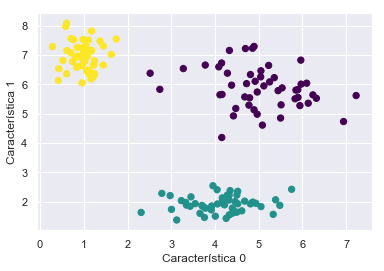

In [31]:
#Leemos los datos
X = read_dat("./data/rand_set.dat")
const_matrix = read_constraints_matrix("./data/rand_set_const_10.const")
const_list = constraints_matrix_to_list(const_matrix)
#Fijamos semilla
np.random.seed(0)
#Ejecutamos el algoritmo:
partition_sol = generational_genetic_algo_SF(X, const_matrix, const_list, k=3)
# Visualizamos la solución obtenida
visualise_rand_clusters(X, partition_sol)

Representación de la partición solución obtenida por el algoritmo **AM-(10,1.0)** en el dataset **Iris** con el 10% de las restricciones:

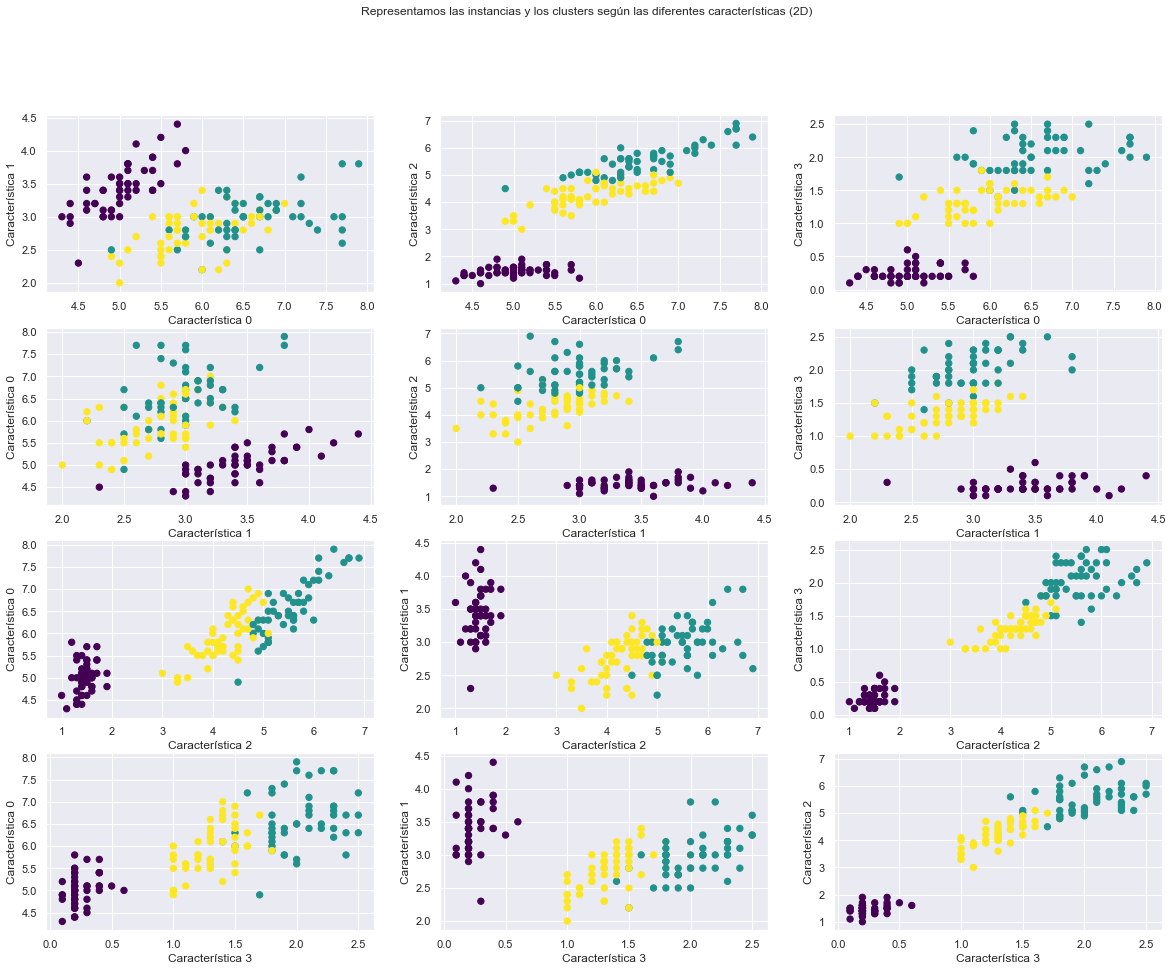

In [32]:
#Leemos los datos
X = read_dat("./data/iris_set.dat")
const_matrix = read_constraints_matrix("./data/iris_set_const_10.const")
const_list = constraints_matrix_to_list(const_matrix)
#Fijamos semilla
np.random.seed(0)
#Ejecutamos el algoritmo:
partition_sol = memetic_algo_v1(X, const_matrix, const_list, k=3)
# Visualizamos la solución obtenida
visualise_iris_clusters(X, partition_sol)

# 6.- Extra:  Algoritmo memético con búsqueda local normal (no suave)

Se hacen unas pequeñas modificaciones en los argumentos y las salidas del algoritmo de búsqueda local original (el de la práctica 1) para que pueda sustituir al algoritmo de búsqueda local suave y crear así un nuevo algoritmo memético.

Además se añaden algunas variables en el algoritmo memético para monitorizar el número de búsquedas locales (suaves o no suaves) que se realizan (con 100000 evaluaciones de la función objetivo) y el número medio de evaluaciones que consumen cada una de las búsquedas locales (de nuevo, la original *BL* y la suave *BLS*). 

Finalmente, compararemos estas variables ejecutando ambos algoritmos meméticos sobre el mismo conjunto de datos grande (*Ecoli* con 20% de restricciones).

In [2]:
def local_search_memetic(X, const_list, partition, current_func_value, 
                        assignations_counter, k, max_failures, counter, lambda_):
    #Esta función no hace uso de max_failures (se recibe como argumento para minimizar los cambios en la implementación)
    n_instances = X.shape[0]
    if lambda_ == None:
        lambda_ = max_dist(X) / len(const_list)
    #Creamos una lista de parejas [(0,+1),(0,+2),..,(1,+1),(1,+2),...,(n_instances, +1),...] Esta lista representará todas las 
    #operaciones de movimiento posibles desde una particion dada. Esto será lo que barajemos.
    virtual_neighborhood = [(index, to_add) for index in range(n_instances) for to_add in range(1, k)]
    found_better_sol = True
    while (counter <= 100000 and found_better_sol): #Condición-Parada: Encontrar mejor solución de un entorno o 100000 eval.
        found_better_sol = False
        np.random.shuffle(virtual_neighborhood)
        i = 0
        while (counter <= 100000 and (not found_better_sol) and i<n_instances):
            operation = virtual_neighborhood[i]
            tmp = partition[operation[0]]
            #Ejecutamos la operación
            partition[operation[0]] = (partition[operation[0]] + operation[1]) % k
            func_val = objective_func(X, partition, const_list, centroids = None, lambda_ = lambda_)
            counter += 1
            #Si la operación nos lleva a una mejor partición que sea válida, nos quedamos con ella.
            if (func_val < current_func_value and assignations_counter[tmp] > 1): 
                assignations_counter[tmp] -= 1
                assignations_counter[partition[operation[0]]] += 1
                current_func_value = func_val
                found_better_sol = True
            else: #Si no, volvemos a la particición anterior y probamos con la siguiente operación
                partition[operation[0]] = tmp 
            i += 1
    return partition, current_func_value, assignations_counter, counter 

In [3]:
def memetic_algo_ls(X, const_matrix, const_list, k, lambda_ = None, cross_operator = fixed_segment_operator, 
                 population_size = 10, cross_prob = 0.7, mutation_prob = 0.001,
                 generation_per_ls = 10, perc_ls = 1.0, best_population = False, 
                 local_search_algo = smooth_local_search): 
    n_instances = X.shape[0]
    n_cross_expected = int(cross_prob * population_size / 2) #Número esperado de cruces (2 hijos por cruce)
    n_mutations_expected = int(mutation_prob * population_size * n_instances) #Número esperado de mutaciones
    n_solutions_for_local_search = int(population_size * perc_ls)
    max_failures = int(0.1 * n_instances)
    n_local_searches = 0
    counters_per_ls = []
    if lambda_ == None:
        lambda_ = max_dist(X) / len(const_list)
    counter = 0 #Contamos el número de veces que se evalua la función objetivo
    #Generamos la población inicial:
    current_population, counter = generate_initial_population(X, const_list, k, lambda_, population_size, counter)
    current_population.sort(key=lambda x:x[1]) #Ordenamos la población según la calidad de los cromosomas (de mejor a peor)
    while (counter < 100000): 
        for generation in range(generation_per_ls):
            new_population, counter = new_generation(X, const_list, k, lambda_, population_size, counter, n_cross_expected, 
                                                 n_instances, cross_operator, n_mutations_expected, current_population)
            #Ordenamos la nueva población
            new_population.sort(key=lambda x:x[1]) #Ordenamos la población según la calidad de los cromosomas (de mejor a peor)
            #Aplicamos el elitismo
            if current_population[0][1] < new_population[0][1]: 
                new_population[population_size-1] = current_population[0]
                new_population.sort(key=lambda x:x[1])
            current_population = new_population
        #Aplicamos la búsqueda local suave a la proporción de la población determinada por perc_ls y best_population.
        if best_population:
            indices_for_ls = list(range(n_solutions_for_local_search))
        else:
            indices_for_ls = random.sample(range(population_size), n_solutions_for_local_search)
        for i in indices_for_ls:
            partition, func_value, assignations_counter, counter1 = local_search_algo(X, const_list,
                                                                                       current_population[i][0], 
                                                                                       current_population[i][1], 
                                                                                       current_population[i][2], k, 
                                                                                       max_failures,counter=0,lambda_=lambda_)
            #MODIFICACIÓN:
            n_local_searches += 1
            counters_per_ls.append(counter1)
            counter += counter1
            
            current_population[i] = [partition, func_value, assignations_counter]
        
        print("Número de evaluaciones total: " + str(counter), end="\r", flush=True)
    return current_population[0][0], n_local_searches, counters_per_ls

Cargamos el conjunto de datos *Ecoli* con 20% de restricciones.

In [4]:
fname_data = "./data/ecoli_set.dat"
X = read_dat(fname_data)
const_file = "./data/ecoli_set_const_20.const"
const_matrix = read_constraints_matrix(const_file)
const_list = constraints_matrix_to_list(const_matrix)

Ejecutamos el algoritmo memético que usa la búsqueda local suave (*BLS*).

In [5]:
np.random.seed(0)
partition_sol1, n_local_searches1, counters_per_ls1 = memetic_algo_ls(X, const_matrix, const_list, k=3, 
                                                                    local_search_algo = smooth_local_search)

Ejecutamos el algoritmo memético que usa la búsqueda local (*BL*).

In [6]:
np.random.seed(0)
partition_sol2, n_local_searches2, counters_per_ls2 = memetic_algo_ls(X, const_matrix, const_list, k=3, 
                                                                    local_search_algo = local_search_memetic)

Comparamos el número de búsquedas locales (suaves o no) que se ejecutan en cada caso, así como el número medio de evaluaciones de la función objetivo que consume cada tipo de búsqueda.

In [7]:
print("Número de búsquedas locales SUAVES realizadas: ", n_local_searches1)
print("Número medio de evaluaciones de la función objetivo por búsqueda local suave: ", np.mean(counters_per_ls1))
print("Número de búsquedas locales (no suaves) realizadas: ", n_local_searches2)
print("Número medio de evaluaciones de la función objetivo por búsqueda local (no suave): ", np.mean(counters_per_ls2))

Número de búsquedas locales SUAVES realizadas:  1270
Número medio de evaluaciones de la función objetivo por búsqueda local suave:  71.69921259842519
Número de búsquedas locales (no suaves) realizadas:  40
Número medio de evaluaciones de la función objetivo por búsqueda local (no suave):  2559.125


Comprobamos (como era esperable) que el número de búsquedas locales suaves que se pueden hacer con 100000 evaluaciones de la función objetivo es mucho mayor que el número de búsquedas locales (no suaves) que podemos ejecutar ($1270$ vs $40$), pues cada *BL* consume de media muchas más evaluaciones que cada *BLS* ($2559.125$ vs $71.7$). Este hecho justifica el uso de la *BLS* en lugar de la *BL* original para otorgarle más peso a la parte del algoritmo memético que se corresponde con el algoritmo genético generacional (si las búsquedas locales consumen menos evaluaciones, se producirán más generaciones de la población antes de llegar a las 100000 evaluaciones).

En concreto, el algoritmo memético que usa la *BLS* ha consumido $100006-(1270*71.7) = 100006 - 91059 = 8947 $ evaluaciones en la parte generacional del algoritmo (la asociada al algoritmo genético generacional), mientras que el algoritmo de búsqueda local ha consumido tan solo $102656 - (40 * 2559.125) = 102656 - 102365 = 291$ evaluaciones en esta parte generacional. (Recordamos que el hecho de que se sobrepasen un poco las 100000 evaluaciones se debe a que la comprobación tan solo se hace en el bucle *while* principal, lo cual se hace por simplicidad y se indicó en el foro que no sería un problema).

Finalmente mostramos también la calidad de las soluciones que se han obtenido por ambos algoritmos meméticos en terminos de desviación general, infactibilidad y función objetivo (aunque esta comparación no será muy determinante para ver qué algoritmo funciona mejor, ya que se basa en una sola ejecución en un solo conjunto de datos).

In [8]:
print("Desviación general usando BLS: ", general_deviation(X, partition_sol1))
print("Desviación general usando BL (no suave): ", general_deviation(X, partition_sol2))

Desviación general usando BLS:  173.60871058686703
Desviación general usando BL (no suave):  135.4291309721036


In [9]:
print("Infactibilidad usando BLS: ", infeasibility(partition_sol1, const_list))
print("Infactibilidad usando BL (no suave): ", infeasibility(partition_sol2, const_list))

Infactibilidad usando BLS:  2750
Infactibilidad usando BL (no suave):  5487


In [10]:
print("Agregado usando BLS: ", objective_func(X, partition_sol1, const_list))
print("Agregado usando BL (no suave): ", objective_func(X, partition_sol2, const_list))

Agregado usando BLS:  210.4993372695155
Agregado usando BL (no suave):  209.03599228399167


Vemos que el nuevo algoritmo memético que hace uso de la búsqueda local original ha sido capaz de obtener una mejor solución (en términos de la función objetivo) que el algoritmo memético que usa la búsqueda local suave. Aunque la diferencia no es muy grande (y como hemos comentado esta comparación no es del todo determinante), esto nos sugiere que darle más peso a la parte generacional del algoritmo memético no tiene por qué ser necesariamente beneficioso.

In [ ]:
-